In [2]:
import sys
sys.path.insert(1, '../../')
sys.path.insert(1, '../')

import  sc_preprocess


# general imports
import warnings
import numpy as np
import os
import pandas as pd
import scipy as sp
from scipy.sparse import coo_matrix
import collections
import scanpy as sc


# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE
import sklearn as sk
from sklearn.preprocessing import scale

# matplotlib settings for Jupyter notebooks only
%matplotlib inline

import pickle
import gzip
from pathlib import Path

In [3]:
# parameters

aug_data_path = "/Users/suraj/Documents/rotation 3/scanpy/sc_bulk_ood/sc_preprocessing1/out"
cybersort_path = f"{os.getcwd()}/../data/single_cell_data/cybersort_pbmc/"
data_path = f"{os.getcwd()}/../data/single_cell_data/pbmc6k/hg19/"
scpred_path = f"{os.getcwd()}/../results/single_cell_data/pbmc_cell_labels/"


num_cells_vec = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
num_cells_vec = [5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]


#####################
### set the study ###
#####################

res_name = "pbmc6k"
results_file = f"{data_path}/{res_name}.h5ad"

In [4]:
# read in the data

#adata = sc.read_10x_mtx(
#    "../../../data1",                               # the directory with the `.mtx` file
#    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
#    cache=True)                              # write a cache file for faster subsequent reading

#adata.var_names_make_unique()  # this is unnecessary if using `var_names='gene_ids'` in `sc.read_10x_mtx`


In [5]:
adata = sc.read_h5ad('../../../Hs10X.h5ad')    # write a cache file for faster subsequent reading

In [6]:
df = adata.to_df()


In [9]:
df.head()

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A3GALT2,A4GALT,A4GNT,...,ULBP1,WTH3DI,XIRP1,Z82196.2,Z84488.1,Z99755.2,Z99916.3,ZNF280A,ZPBP2,CD99.Y
Hs_OAT_254-1_GAGTTGTGTATAGGGC,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Hs_OAT_13-1_GAACGTTTCGTTACCC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Hs_OAT_254-1_ATCACTTGTTCAGGTT,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Hs_SAT_01-1_TCTCAGCTCTTCCCGA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Hs_SAT_266-1_CTTCCTTCACGCTGTG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:

df.reset_index(inplace=True)
df = df.rename(columns = {'index':'cell_id'})

In [11]:
barcodes = df["cell_id"]

In [ ]:
df.head()

,cell_id,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A3GALT2,A4GALT,...,ULBP1,WTH3DI,XIRP1,Z82196.2,Z84488.1,Z99755.2,Z99916.3,ZNF280A,ZPBP2,CD99.Y
0,Hs_OAT_254-1_GAGTTGTGTATAGGGC,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Hs_OAT_13-1_GAACGTTTCGTTACCC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Hs_OAT_254-1_ATCACTTGTTCAGGTT,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Hs_SAT_01-1_TCTCAGCTCTTCCCGA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Hs_SAT_266-1_CTTCCTTCACGCTGTG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
meta_data = pd.read_csv("../../../data1/GSE176171_cell_metadata.tsv", sep="\t")
meta_data.head()

/var/folders/_q/smmq18qd48d02xgt4dg064880000gn/T/ipykernel_51553/3336271786.py:1: DtypeWarning: Columns (19,20,21,22,23,24,30,32,33,36,37,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  meta_data = pd.read_csv("../../../data1/GSE176171_cell_metadata.tsv", sep="\t")


,cell_id,biosample_id,biosample_type,library_preparation_protocol__ontology_id,library_preparation_protocol__ontology_label,donor_id,species__ontology_id,species__ontology_label,organ__ontology_id,organ__ontology_label,...,ribosomal_protein_percent,sct__n_umis,sct__n_genes,cell_cycle__s_score,cell_cycle__g2m_score,cell_cycle__phase,cell_type__ontology_id,cell_type__ontology_label,cell_type__custom,cell_subtype__custom
0,Hs_OAT_01-1_AAACCCAAGCAAGGAA,Hs_OAT_01-1,PrimaryBioSample_Tissue,EFO:0009922,10x 3' v3 sequencing,TP01,NCBITaxon:9606,Homo sapiens,UBERON:0001013,adipose tissue,...,0.320758,5042,3178,0.013315,-0.002799,S,CL:0000077,mesothelial cell,mesothelium,hMes1
1,Hs_OAT_01-1_AAACCCAAGGGTGGGA,Hs_OAT_01-1,PrimaryBioSample_Tissue,EFO:0009922,10x 3' v3 sequencing,TP01,NCBITaxon:9606,Homo sapiens,UBERON:0001013,adipose tissue,...,0.489574,4905,2578,-0.051260,-0.012629,G1,CL:0000235,macrophage,macrophage,hMac3
2,Hs_OAT_01-1_AAACCCAAGTCTGGAG,Hs_OAT_01-1,PrimaryBioSample_Tissue,EFO:0009922,10x 3' v3 sequencing,TP01,NCBITaxon:9606,Homo sapiens,UBERON:0001013,adipose tissue,...,0.599401,3607,1808,0.046359,-0.009526,S,CL:0000235,macrophage,macrophage,hMac1
3,Hs_OAT_01-1_AAACCCACAGCCCAGT,Hs_OAT_01-1,PrimaryBioSample_Tissue,EFO:0009922,10x 3' v3 sequencing,TP01,NCBITaxon:9606,Homo sapiens,UBERON:0001013,adipose tissue,...,0.420800,5029,3041,0.018981,0.021519,G2M,CL:0000077,mesothelial cell,mesothelium,hMes3
4,Hs_OAT_01-1_AAACCCACATCTTCGC,Hs_OAT_01-1,PrimaryBioSample_Tissue,EFO:0009922,10x 3' v3 sequencing,TP01,NCBITaxon:9606,Homo sapiens,UBERON:0001013,adipose tissue,...,0.166098,4776,2539,0.028879,-0.005132,S,CL:0000136,fat cell,adipocyte,hAd2


In [13]:
meta_data.donor_id.value_counts()

TP01        42089
HFD01       24309
NCD02.F     21001
HFD07.F     17138
HFD03       16787
UP1010-S    16416
HFD04       15955
HFD02       15895
UP1018-S    15805
NCD06       13822
NCD07       13811
NCD01.F     13652
EPI254      13243
HFD06.F     12865
NCD09       11990
EPI266      11509
NCD10       10685
UP1008-B     8328
EPI235       7592
EPI255       6995
EPI256       6967
HFD05        6473
UP1005-S     6029
TP02         5711
EPI236       4988
EPI239       4607
EPI238       4555
EPI242       3500
NCD08        3338
UP1009-S     2066
TP04         2039
EPI237       1352
EPI248       1047
EPI253        487
EPI249        417
EPI240        407
Name: donor_id, dtype: int64

In [14]:
#meta_df = barcodes.join(other=meta_data, on=['cell_id'], how='left', sort=False)
meta_df = pd.merge(barcodes, meta_data, on='cell_id')

In [15]:
adata.obs['CellType'] = meta_df['cell_type__ontology_label'].tolist()

In [ ]:
# add metadata

# add metadata

#barcodes = pd.read_csv("../../../data1/barcodes.tsv.gz", header=None, names=['code'])
#adata_meta_df = df.join(other=meta_data, on=['cell_id'], how='left', sort=False)
#df = pd.merge(df, meta_data, on='cell_id')

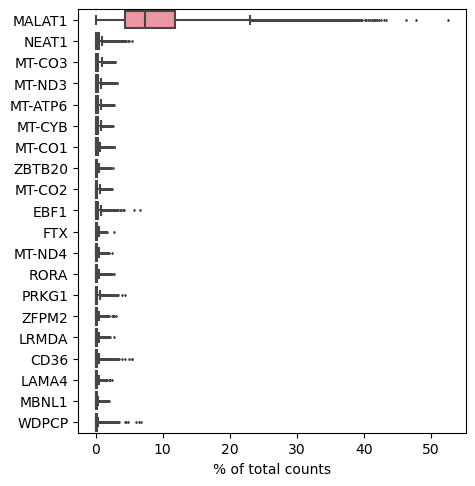

In [ ]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [ ]:
# filter out cells with less than 200 genes and genes expressed in less than 3 cells
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

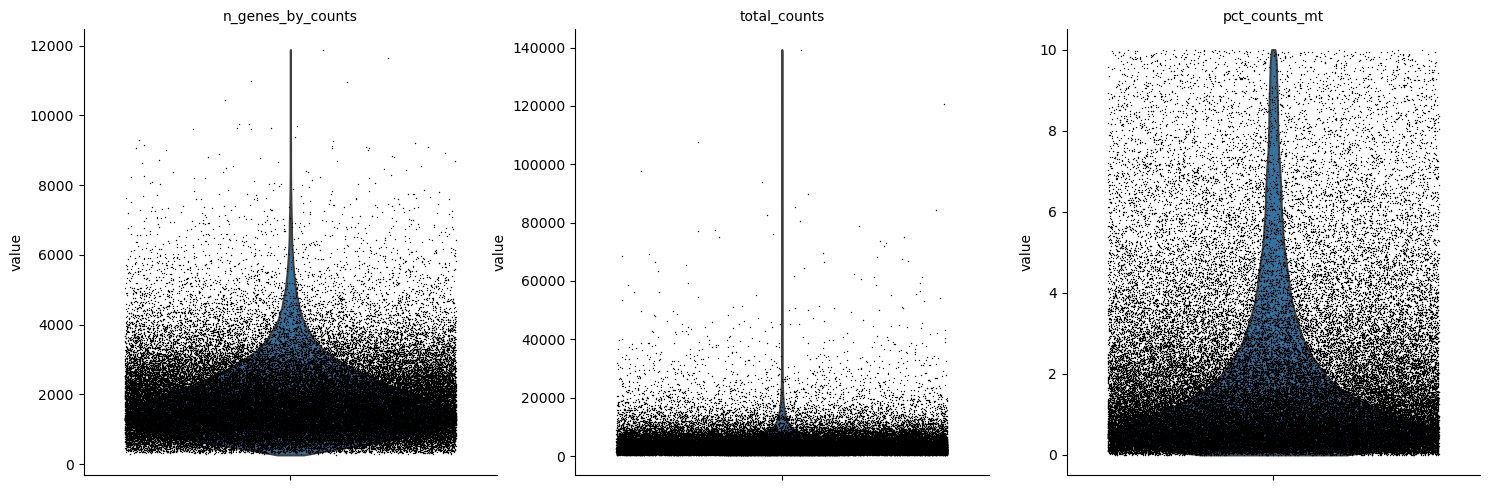

In [ ]:
# remove genes with high mitochondrial content
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

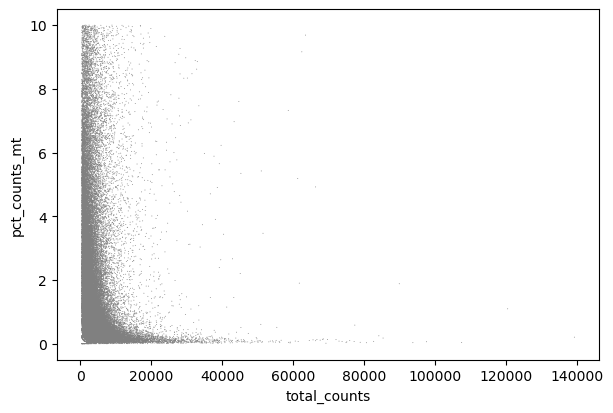

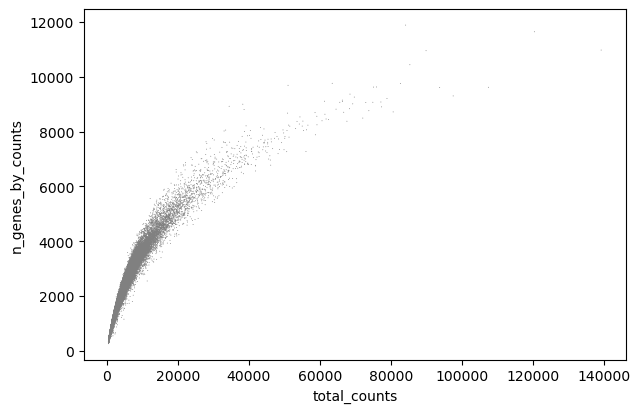

In [ ]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')


In [ ]:
# slice the data based on the plots from above
# remove cells with more than 3500 genes
# remove cells with more than 10% MTgenes
adata = adata[adata.obs.n_genes_by_counts < 8000, :]
adata = adata[adata.obs.pct_counts_mt < 10, :]


# normalize to 10K counts per cell
sc.pp.normalize_total(adata, target_sum=1e4)

/Users/suraj/opt/miniconda3/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [ ]:
# group together cell types that are not very frequent

all_vals = adata.obs["CellType"].to_list()
all_vals = np.char.replace(all_vals, 'adc', 'other')
all_vals = np.char.replace(all_vals, 'pdc', 'other')
all_vals = np.char.replace(all_vals, 'mk', 'other')
all_vals = np.char.replace(all_vals, 'hsc', 'other')
adata.obs["CellType"] = all_vals


In [ ]:
from collections import Counter

Counter(all_vals)

Counter({'preadipocyte': 11222,
         'smooth muscle cell': 1222,
         'fat cell': 4636,
         'mesothelial cell': 9251,
         'mast cell': 507,
         'endothelial cell': 5586,
         'T cell': 2454,
         'macrophage': 5500,
         'monocyte': 422,
         'B cell': 162,
         'stromal cell of endometrium': 136,
         'endothelial cell of lymphatic vessel': 1034,
         'dendritic cell': 329,
         'immature NK T cell': 877,
         'pericyte cell': 614,
         'neutrophil': 76})

In [ ]:
# write out data for BP and cibersort
dense_matrix = adata.X.todense()

sc_profile_file = os.path.join(aug_data_path, f"{res_name}_sig.pkl")
sc_profile_path = Path(sc_profile_file)

dense_df = pd.DataFrame(dense_matrix, columns = adata.var['gene_ids'])
dense_df.insert(loc=0, column='scpred_CellType', value=adata.obs["scpred_CellType"].to_list())


pickle.dump( dense_df, open( sc_profile_path, "wb" ) )

In [ ]:
# Perform dimensionality reduction using principal component analysis (PCA)
sc.pp.normalize_total(adata)  # normalize the expression data
sc.pp.log1p(adata)            # log-transform the data
sc.pp.highly_variable_genes(adata)  # identify highly variable genes
sc.pp.pca(adata, n_comps=50, use_highly_variable=True)  # run PCA

# Perform clustering on the PCA-reduced data
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=10)  # calculate neighborhood graph
sc.tl.leiden(adata)  # cluster cells using the Leiden algorithm
#sc.pl.umap(adata, color=['leiden'])  # plot UMAP with cell clusters colored

/Users/suraj/opt/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/Users/suraj/opt/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


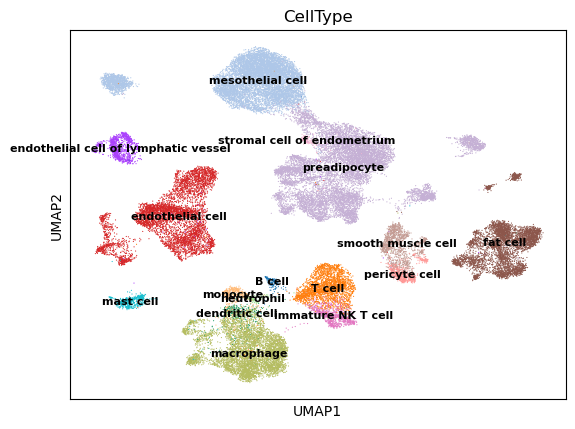

In [ ]:
# valculate neighborhood graph
sc.pp.neighbors(adata)

# make umap
sc.tl.umap(adata)

# plot some markers of the RAW data
sc.pl.umap(adata, legend_loc='on data', color='CellType', legend_fontsize=8)

Make Pseudobulks

In [ ]:
#adata.write("test_data.h5ad")

In [ ]:
adata.obs

,CellType,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,scpred_CellType,leiden
Hs_OAT_254-1_GAGTTGTGTATAGGGC,preadipocyte,509,509,653.0,33.0,5.053599,preadipocyte,2
Hs_OAT_13-1_GAACGTTTCGTTACCC,preadipocyte,1559,1559,2542.0,37.0,1.455547,preadipocyte,8
Hs_OAT_255-1_TTCAATCTCCTATTTG,smooth muscle cell,971,971,1424.0,72.0,5.056180,smooth muscle cell,11
Hs_OAT_254-1_GATCCCTGTTGTTTGG,fat cell,1928,1928,4596.0,61.0,1.327241,fat cell,17
Hs_SAT_01-1_ATGTCCCTCAAGTGGG,preadipocyte,1482,1482,2386.0,12.0,0.502934,preadipocyte,8
...,...,...,...,...,...,...,...,...
Hs_SAT_11-1_AATGACCGTCACGACC,endothelial cell,1378,1378,2308.0,183.0,7.928943,endothelial cell,10
Hs_OAT_12-1_AGTGCCGCAATAGTAG,macrophage,1992,1992,3405.0,72.0,2.114537,macrophage,12
Hs_SAT_254-1_TCCATGCGTTGGGATG,preadipocyte,1222,1222,1963.0,26.0,1.324503,preadipocyte,1
Hs_SAT_254-1_ATCCCTGTCGCTTTAT,preadipocyte,1080,1080,1634.0,14.0,0.856793,preadipocyte,4


In [ ]:
len_vector = adata.obs["CellType"].unique().shape[0]
cell_noise = [np.random.lognormal(0, 0, adata.var['gene_ids'].shape[0]) for i in range(len_vector)]

# make b-cells be perturbed -- this will be used for unlabeled
cell_noise_perturb = cell_noise
cell_noise_perturb[0] = np.random.lognormal(0, 0.7, adata.var['gene_ids'].shape[0])

In [ ]:
# write out the gene ids
gene_pass = adata.var['gene_ids']
gene_out_file = os.path.join(aug_data_path, f"{res_name}_genes.pkl")
gene_out_path = Path(gene_out_file)
pickle.dump( gene_pass, open( gene_out_path, "wb" ) )

1.0

In [ ]:
#Cell type proportion
rand_vec = adata.obs["CellType"].value_counts() / adata.obs["CellType"].shape[0]
rand_vec
rand_vec = np.array(rand_vec)

np.round(rand_vec*num_cells)

array([1274., 1051.,  634.,  625.,  526.,  279.,  139.,  117.,  100.,
         70.,   58.,   48.,   37.,   18.,   15.,    9.])

In [ ]:
np.random.lognormal(5, np.random.uniform(1,3), 5)

array([  8.38420767, 297.80010986,  36.48992687,  32.60908751,
        64.80597195])

In [ ]:
np.zeros((10, 4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [ ]:

# simulate different number of cells
num_samples = 1000
for idx in range(len(num_cells_vec)):
  print(f"New Domain {idx}")
  pbmc_rep1_pseudobulk_file = os.path.join(aug_data_path, f"{res_name}_pseudo_{idx}.pkl")
  pbmc_rep1_prop_file = os.path.join(aug_data_path, f"{res_name}_prop_{idx}.pkl")
  test_pbmc_rep1_pseudobulk_file = os.path.join(aug_data_path, f"{res_name}_testpseudo_{idx}.pkl")
  test_pbmc_rep1_prop_file = os.path.join(aug_data_path, f"{res_name}_testprop_{idx}.pkl")

  # if unlabeled data, we need to have both perturbed and non-perturbed cell types
  # idx 0 is for testing and will be perturbed
  # idx 1-4 are not perturbed because they are labeled
  # idx 5 is ignored for now, we will make it perturbed
  # idx 6-9 are unlabeled and will have be perturbed half not be
  # so this makes idx 5,6,7 perturbed
  # idx 8,9 unperturbed
  # summary:
  # perturbed: 0,5,6,7
  # unperturb: 1,2,3,4,8,9
  # train: 1,2,3,4,6,7,8,9
  # test:  0
  # labeled: 1,2,3,4
  # unlabeled: 6,7,8,9

  #perturbed_idx = np.array([0,5,6,7])
  #cell_noise_choice = cell_noise
  #if idx in perturbed_idx:
  #  cell_noise_choice = cell_noise_perturb

  pseudobulk_path = Path(pbmc_rep1_pseudobulk_file)
  prop_path = Path(pbmc_rep1_prop_file)
  test_pseudobulk_path = Path(test_pbmc_rep1_pseudobulk_file)
  test_prop_path = Path(test_pbmc_rep1_prop_file)

  if not pseudobulk_path.is_file(): # skip if we already generated it
    # make the pseudobulks
    num_cells = num_cells_vec[idx]
    prop_df, pseudobulks_df, test_prop_df, test_pseudobulks_df = sc_preprocess.make_prop_and_sum(adata, 
                                                                            num_samples, 
                                                                            num_cells,
                                                                            use_true_prop=False,
                                                                            cell_noise=cell_noise_choice)

    # make the proportions instead of cell counts
    prop_df = prop_df.div(prop_df.sum(axis=1), axis=0)
    test_prop_df = test_prop_df.div(test_prop_df.sum(axis=1), axis=0)

    pickle.dump( prop_df, open( prop_path, "wb" ) )
    pickle.dump( pseudobulks_df, open( pseudobulk_path, "wb" ) )

    pickle.dump( test_prop_df, open( test_prop_path, "wb" ) )
    pickle.dump( test_pseudobulks_df, open( test_pseudobulk_path, "wb" ) )


    if not np.all(np.isclose(prop_df.sum(axis=1), 1.)):
        assert False, "Proportions do not sum to 1"

New Domain 0
0
100
200
300
400
500
600
700
800
900
1000
New Domain 1
0
100
200
300
400
500
600
700
800
900
1000
New Domain 2
0
100
200
300
400
500
600
700
800
900
1000
New Domain 3
0
100
200
300
400
500
600
700
800
900
1000
New Domain 4
0
100
200
300
400
500
600
700
800
900
1000
New Domain 5
0
100
200
300
400
500
600
700
800
900
1000
New Domain 6
0
100
200
300
400
500
600
700
800
900
1000
New Domain 7
0
100
200
300
400
500
600
700
800
900
1000
New Domain 8
0
100
200
300
400
500
600
700
800
900
1000
New Domain 9
0
100
200
300
400
500
600
700
800
900
1000


In [ ]:
##Read pseudobulks smaples from path
pseudobulks = pd.DataFrame(columns = adata.var['gene_ids'])
for  i in range(10):
    with open(f'/Users/suraj/Documents/rotation 3/scanpy/sc_bulk_ood/sc_preprocessing1/out/pbmc6k_pseudo_{i}.pkl', 'rb') as f:
        # Load the Python object from the .pkl file
        pseudobulk = pickle.load(f)
    #plt.imshow(pseudobulks, cmap='viridis', aspect='auto')
    pseudobulk["sample"] = np.full(pseudobulk.shape[0], i)
    pseudobulks = pd.concat([pseudobulks, pseudobulk])
pseudobulks["sample"] = pseudobulks['sample'].astype('category')

In [ ]:
pseudobulk_file = os.path.join(aug_data_path, f"{res_name}_pseudobulk_samples.pkl")
pseudobulk_path = Path(pseudobulk_file)
pickle.dump(pseudobulks, open(pseudobulk_path, "wb" ) )

In [ ]:
with open('/Users/suraj/Documents/rotation 3/scanpy/sc_bulk_ood/sc_preprocessing1/out/pbmc6k_pseudobulk_samples.pkl', 'rb') as f:
    # Load the Python object from the .pkl file
    pseudobulk_df = pickle.load(f)

In [ ]:

def make_tsne_fig(X_df, color_vec, title):
    ## plot samples
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        tsne = TSNE(n_components=2, verbose=0, perplexity=40, init="pca", learning_rate='auto')
        tsne_results = tsne.fit_transform(scale(np.log2(X_df.astype(float)+1.0), axis=1))

    plot_df = pd.DataFrame(tsne_results[:,0:2])
    print(tsne_results.shape)
    print(plot_df.shape)
    plot_df.columns = ['tsne_0', 'tsne_1']
    plot_df['class'] = color_vec

    n_colors = len(np.unique(color_vec))
    g = sns.scatterplot(
        x="tsne_0", y="tsne_1",
        data=plot_df,
        hue="class",
        palette=sns.color_palette("hls", n_colors),
        legend="full",
        alpha=0.3, ax= ax
    )
    ax.set_title(title)
    return g

In [ ]:
#fig, axs = plt.subplots(1, 1, figsize=(15,15))

sample = pseudobulk_df["sample"]
#make_tsne_fig(pseudobulk_df, sample, title="t-SNE")

In [ ]:
sample.to_list()

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    tsne = TSNE(n_components=2, verbose=0, perplexity=40, init="pca", learning_rate='auto')
    tsne_results = tsne.fit_transform(scale(np.log2(pseudobulk_df.astype(float)+1.0), axis=1))

plot_df = pd.DataFrame(tsne_results[:,0:2])
print(tsne_results.shape)
print(plot_df.shape)


(10000, 2)
(10000, 2)


In [ ]:
sample.unique

/Users/suraj/opt/miniconda3/lib/python3.9/site-packages/IPython/lib/pretty.py:778: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  output = repr(obj)


<bound method Series.unique of 0    0.0
0    0.0
0    0.0
0    0.0
0    0.0
    ... 
0    9.0
0    9.0
0    9.0
0    9.0
0    9.0
Name: sample, Length: 10000, dtype: category
Categories (10, float64): [0.0, 1.0, 2.0, 3.0, ..., 6.0, 7.0, 8.0, 9.0]>

In [ ]:
plot_df.columns = ['tsne_0', 'tsne_1']
plot_df['class'] = sample.to_list()



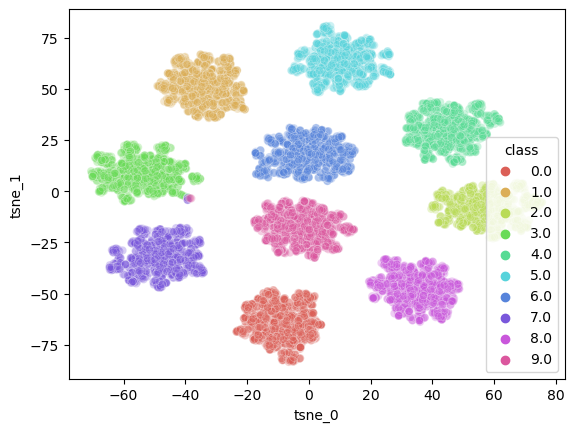

In [ ]:
n_colors = len(np.unique(sample))
g = sns.scatterplot(
    x="tsne_0", y="tsne_1",
    data=plot_df,
    hue="class",
    palette=sns.color_palette("hls", n_colors),
    legend="full",
    alpha=0.3
)
#ax.set_title(title)

In [ ]:
pseudobulks.head()

gene_ids,ENSG00000121410.11,ENSG00000268895.5,ENSG00000148584.14,ENSG00000175899.14,ENSG00000245105.2,ENSG00000166535.19,ENSG00000256661.1,ENSG00000184389.9,ENSG00000128274.15,ENSG00000118017.3,...,ENSG00000261116.1,ENSG00000233775.1,ENSG00000224174.2,ENSG00000273983.1,ENSG00000230401.1,ENSG00000122133.16,ENSG00000170890.13,ENSG00000274808.5,ENSG00000224715.1,smaple
0,160.0,2135.0,2.0,25960.0,292.0,249.0,511.0,89.0,254.0,53.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
0,158.0,1997.0,1.0,39724.0,1562.0,276.0,583.0,108.0,460.0,33.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
0,30.0,342.0,2.0,88777.0,968.0,260.0,2053.0,134.0,1663.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
0,582.0,4038.0,0.0,69565.0,295.0,151.0,1024.0,109.0,926.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
0,230.0,1667.0,3.0,28638.0,527.0,557.0,696.0,115.0,578.0,31.0,...,0.0,0.0,0.0,3.0,0.0,13.0,0.0,0.0,0.0,0


In [ ]:
pseudobulks = pseudobulks.astype(float)

In [ ]:
print(pseudobulks)

gene_ids ENSG00000121410.11 ENSG00000268895.5 ENSG00000148584.14  \
0                       160              2135                  2   
0                       158              1997                  1   
0                        30               342                  2   
0                       582              4038                  0   
0                       230              1667                  3   
..                      ...               ...                ...   
0                       135              1702                  0   
0                       286              1968                  9   
0                       268              2291                  2   
0                       220              2360                  2   
0                       275              1972                  8   

gene_ids ENSG00000175899.14 ENSG00000245105.2 ENSG00000166535.19  \
0                     25960               292                249   
0                     39724              1562  